# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#01FADC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">Playground Series S3-E8 EDA and modeling</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p> 
**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
 This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>


**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Useful information</p>

<p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#2C3FD6; font-size:130%; text-align:left;padding: 0px;"><strong>Playground series S3-E8 Dataset</strong></p>


**🟦EN**: 

*train.csv* - the training dataset; price is the target
*test.csv* - the test dataset; your objective is to predict price
*sample_submission.csv* - a sample submission file in the correct format

**🟥ES**:

*train.csv* - el conjunto de datos de entrenamiento; el precio es el objetivo
*test.csv* - el conjunto de datos de prueba; su objetivo es predecir el precio
*sample_submission.csv* - un archivo de envío de muestra en el formato correcto
    

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Libraries</p>

In [1]:
import os 
import sys
import math
import time
import optuna
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from copy import deepcopy
from catboost import Pool
from functools import partial
from xgboost import XGBRegressor
from itertools import combinations
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap
from sklearn.base import BaseEstimator, TransformerMixin
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV



warnings.filterwarnings('ignore')

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL

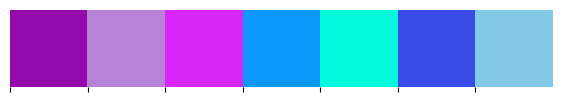

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = ["#cfe6ff", "#a085f2"]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, DARK_BLUE, PURPLE_L,S_BLUE, PURPLE, BLUE, LIGTH_BLUE]

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e8"
TRAIN_FILENAME = "train.csv"
TEST_FILENAME = "test.csv"
SUBMISSION_FILENAME = "sample_submission.csv"

ORIGINAL_PATH = "/kaggle/input/gemstone-price-prediction"
DATA_DICT_NAME = "Data Dictionary.xlsx"
CUBIC_ZIR_NAME = "cubic_zirconia.csv"


# Data dir
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)
DATA_DICT_DIR = os.path.join(ORIGINAL_PATH, DATA_DICT_NAME)
CUBIC_ZIR_DIR = os.path.join(ORIGINAL_PATH, CUBIC_ZIR_NAME)

In [5]:
ID = "id"
CARAT = "carat"
CUT = "cut"
COLOR = "color"
CLARITY = "clarity"
DEPTH = "depth"
TABLE = "table"
POSITION_X = "x"
POSITION_Y = "y"
POSITION_Z = "z"
TARGET = "price"

# Artificial data
CLARITY_SCALED = "clarity_scaled"

In [6]:
CATEGORICAL_COLS = [CUT, COLOR, CLARITY]
NUM_COLS = [CARAT, DEPTH, TABLE, POSITION_X, POSITION_Y, POSITION_Z]
ORDINAL_COLS = []

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [7]:
class AggFeatureExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_col, agg_col, agg_func):
        self.group_col = group_col
        self.group_col_name = ''
        for col in group_col:
            self.group_col_name += col
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.agg_df = None
        self.medians = None
        
    def fit(self, X, y=None):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        
        self.agg_df = X.groupby(group_col)[agg_col].agg(agg_func)
        self.agg_df.columns = [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]
        self.medians = X[agg_col].median()
        
        return self
    
    def transform(self, X):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        agg_df = self.agg_df
        medians = self.medians
        
        X_merged = pd.merge(X, agg_df, left_on=group_col, right_index=True, how='left')
        X_merged.fillna(medians, inplace=True)
        X_agg = X_merged.loc[:, [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]]
        
        return X_agg
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_agg = self.transform(X)
        return X_agg

In [8]:
def split_data(X, y, random_state, test_size=0.2, kfold=False, n_splits=6):
    if kfold:
        kf = KFold(n_splits=n_splits,random_state=random_state, shuffle=True)
        for train_index, val_index in kf.split(X, y):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]
            yield X_train, X_val, y_train, y_val
    else:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
        yield X_train, X_val, y_train, y_val

kfold = True
n_splits = 7
seed = 42

In [9]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [10]:
def plot_cont_dot(
    df, column, target, ax,
    show_yticks=False, color=PALETTE_7[0]
):

    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df[target]
    target = target.groupby(bins).mean()
    target.plot(
        ax=ax, linestyle="",
        marker=".", color=color,
        label=f"Mean {target.name}"
    )
    ax.grid(visible=False)
    
    if not show_yticks:
        ax.get_yaxis().set_ticks([])
        
    return ax

In [11]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap)
    plt.show()

In [12]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [13]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[BLUE,"#221e8f"], color=[BLUE ,GREEN],
            title="Target distribution"):
    df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

In [14]:
def clarity_scale(df):
    df[CLARITY_SCALED] = df[CLARITY].apply(
        lambda x: 0 if x == "IF" else 1 if x == "VVS1" else 2 if x == "VVS2" else 3 if x == "VS1" else 4 if x == "VS2" else 5 if x == "SI1" else 6 if x == "SI2" else 7
    )
    df[CLARITY_SCALED] = df[CLARITY_SCALED].astype(np.int8)
    return df

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [15]:
train_df = pd.read_csv(TRAIN_DIR, index_col=ID)
test_df = pd.read_csv(TEST_DIR, index_col=ID)
original_df = pd.read_csv(CUBIC_ZIR_DIR, index_col=0)
submission_df = pd.read_csv(SUBMISSION_DIR)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [16]:
data_description(train_df)
data_description(test_df)
data_description(original_df)
data_description(submission_df)

Data description
Total number of records 193573
number of features 10


      Name     Type  Unique levels  Missing
0    carat  float64            248        0
1      cut   object              5        0
2    color   object              7        0
3  clarity   object              8        0
4    depth  float64            153        0
5    table  float64            108        0
6        x  float64            522        0
7        y  float64            521        0
8        z  float64            349        0
9    price    int64           8738        0
Data description
Total number of records 129050
number of features 9


      Name     Type  Unique levels  Missing
0    carat  float64            252        0
1      cut   object              5        0
2    color   object              7        0
3  clarity   object              8        0
4    depth  float64            143        0
5    table  float64            101        0
6        x  float64            521        0
7        y  float64  

In [17]:
train_df.columns.values

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'], dtype=object)

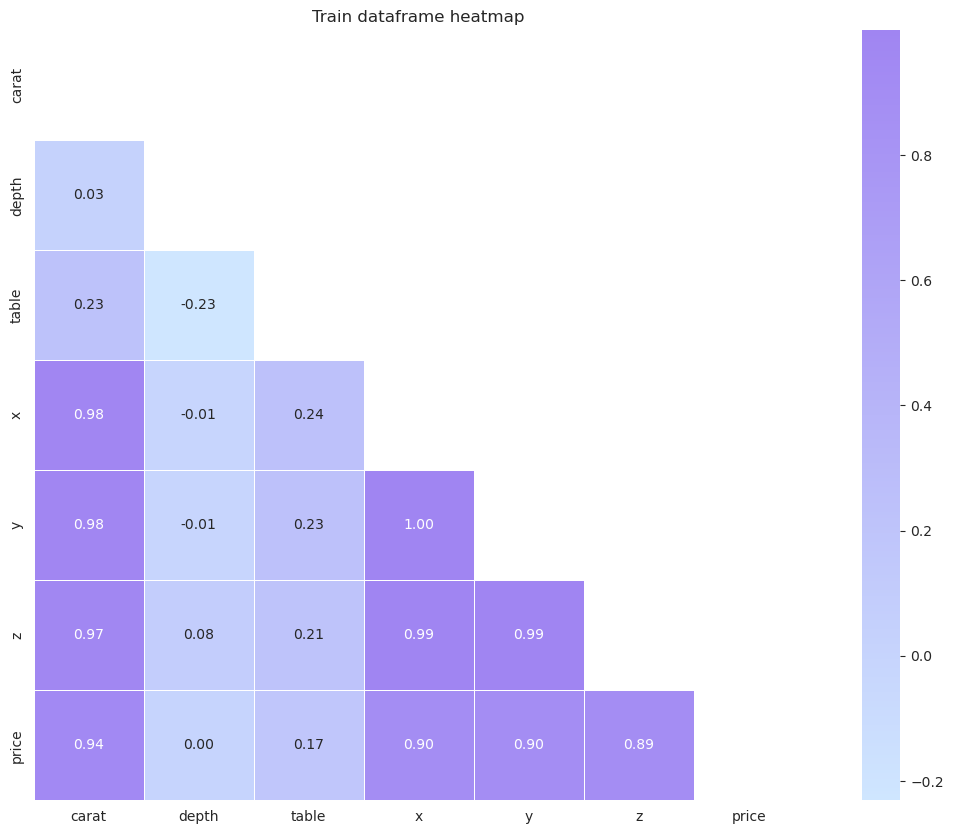

None

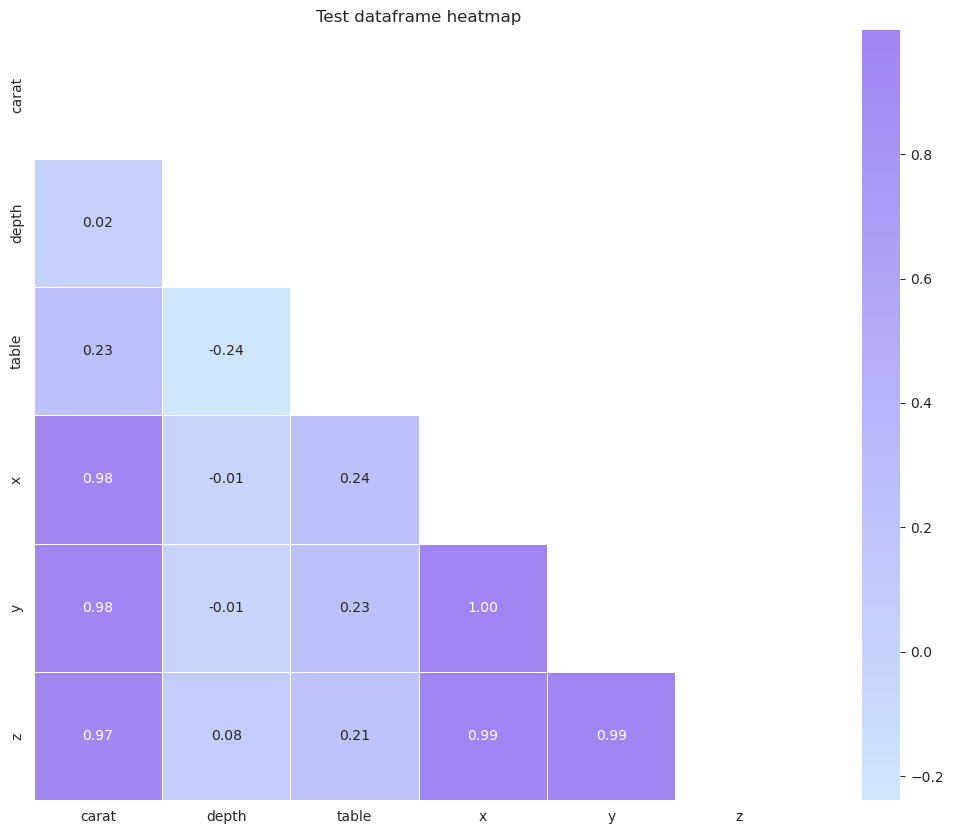

None

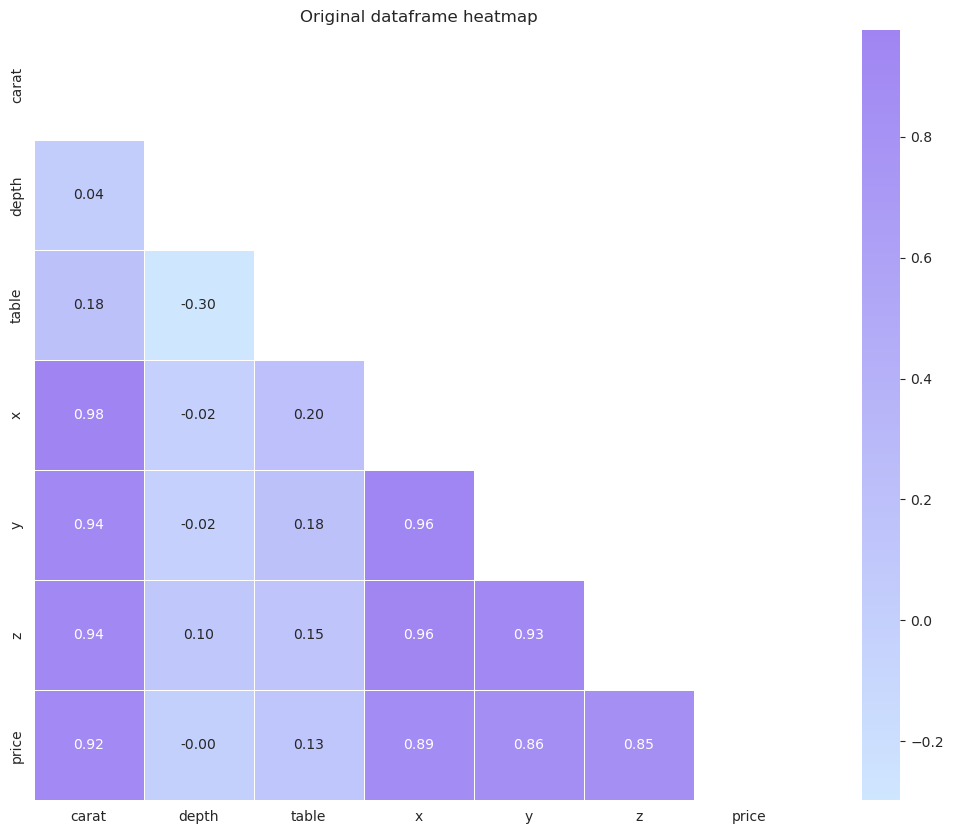

None

In [18]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))
display(show_corr_heatmap(original_df, "Original dataframe heatmap"))

In [19]:
labels = ["train", "test", "original"]

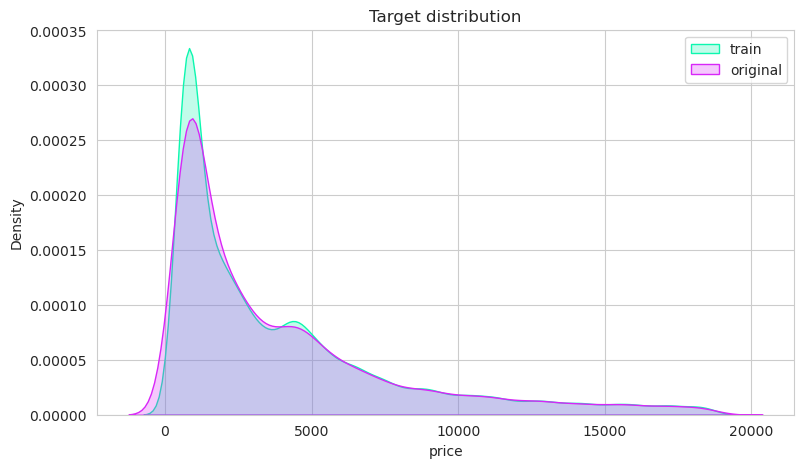

In [20]:
plt.figure(figsize=(9,5))
sns.kdeplot(data=train_df, x=TARGET,
            label=labels[0], color=PALETTE_3[1],
            fill=True)
sns.kdeplot(data=original_df, x=TARGET,
            label=labels[2], color=PALETTE_3[2],
            fill=True)
plt.title("Target distribution")
plt.legend()

In [21]:
comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

In [22]:
comb_df

,index,carat,cut,color,clarity,depth,table,x,y,z,price,set
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0,train
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0,train
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0,train
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0,train
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
349585,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408.0,original
349586,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114.0,original
349587,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656.0,original
349588,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682.0,original


In [23]:
# test_df.drop(ID, axis=1, inplace=True)
# train_df.drop(ID, axis=1, inplace=True)
all_columns = test_df.columns
num_columns = np.setdiff1d(all_columns, CATEGORICAL_COLS)

num_columns

array(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype=object)

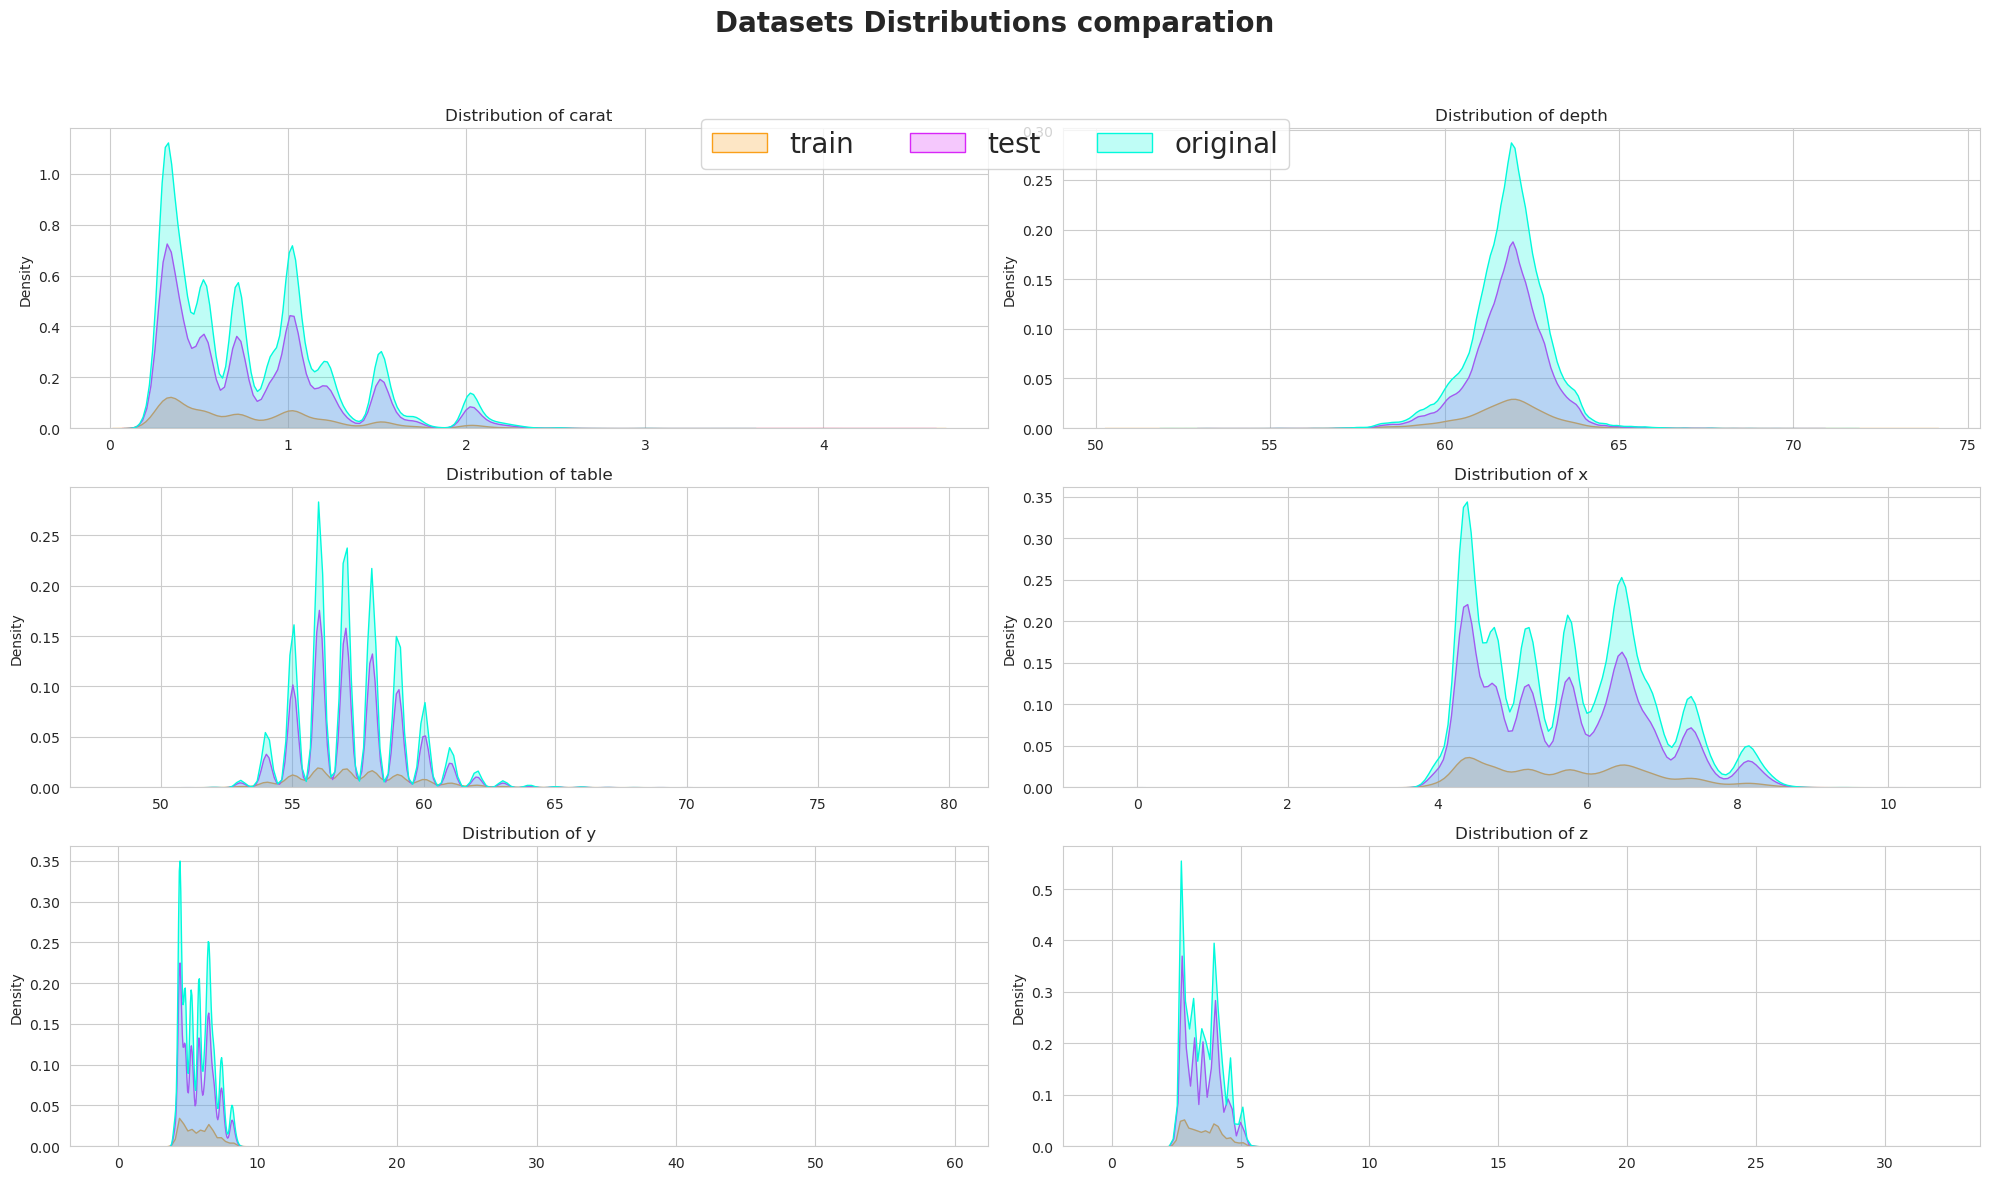

In [24]:
n_cols = 2
n_rows = math.ceil(len(num_columns)/n_cols)
#kde_palette = {labels[0]: PALETTE_5[2], labels[1]: PALETTE_5[4]}
kde_palette = {labels[0]: PALETTE_6[4], labels[1]: PALETTE_6[5], labels[2]: PALETTE_6[2]}

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(num_columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        data=comb_df,x = column, hue = "set", label="Test PS datafraem",
        ax=ax[i], palette=kde_palette, fill=True
    )
#     sns.kdeplot(
#         data=comb_df, x=column, hue="set", label="Train PS dataframe",
#         ax=ax[i], color=PALETTE_4[3], fill=True
#     )
    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

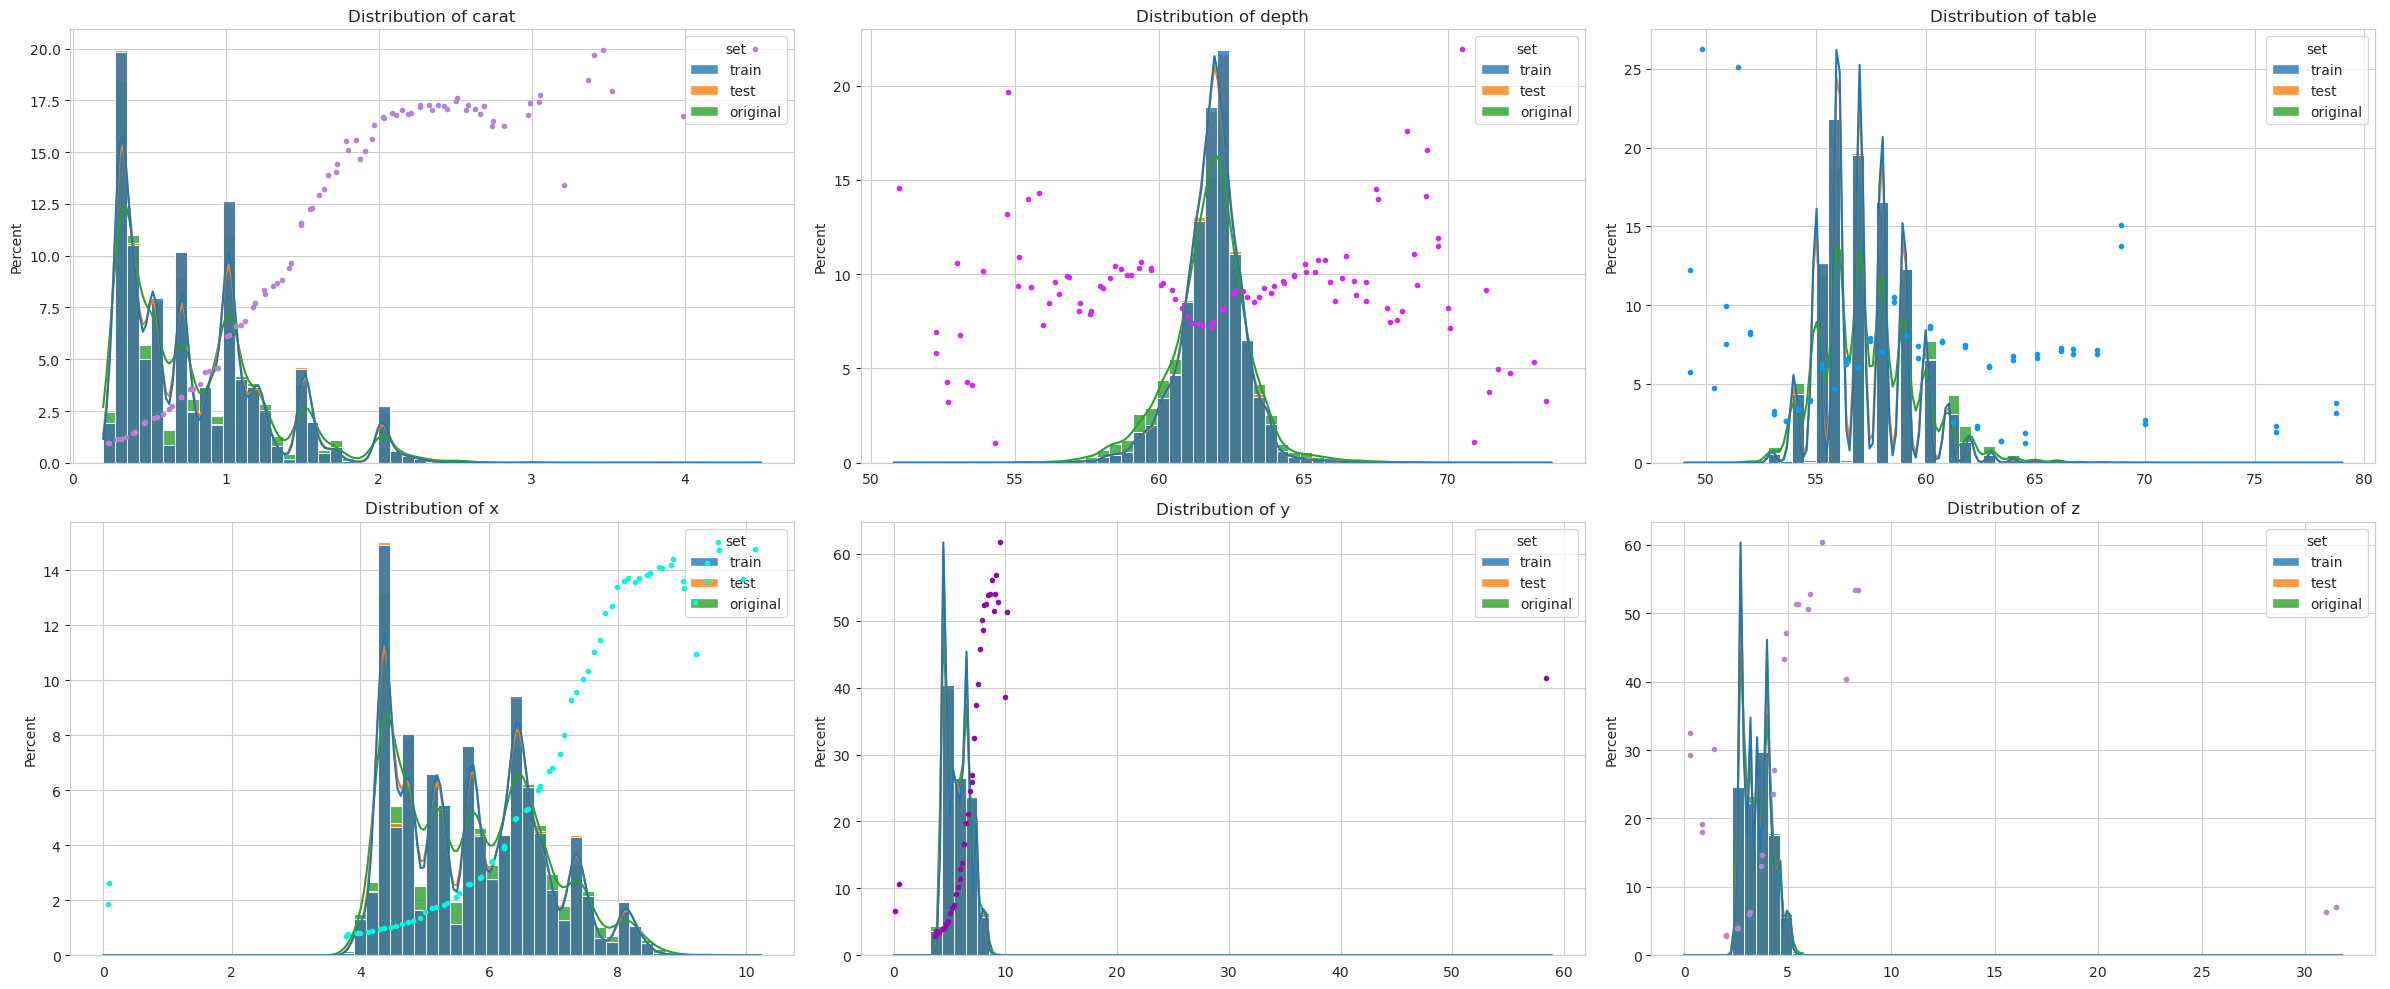

In [25]:
x = 0
n_bins = 55
histplot_hyperparams = {
    "kde":True,
    "alpha":0.8,
    "bins":n_bins,
    "stat":"percent",
}
line_style='-'

columns =  ORDINAL_COLS + NUM_COLS
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(24, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    if x == 4:
        x = 0
    else:
        x = x + 1
    plot_axes = [ax[i]]
    
    if column in ORDINAL_COLS:
        plot_ordinals(column, ax[i], PALETTE_7[x])
    else:
        plot_cont(column, ax[i], PALETTE_7[x])

    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")

plt.tight_layout()

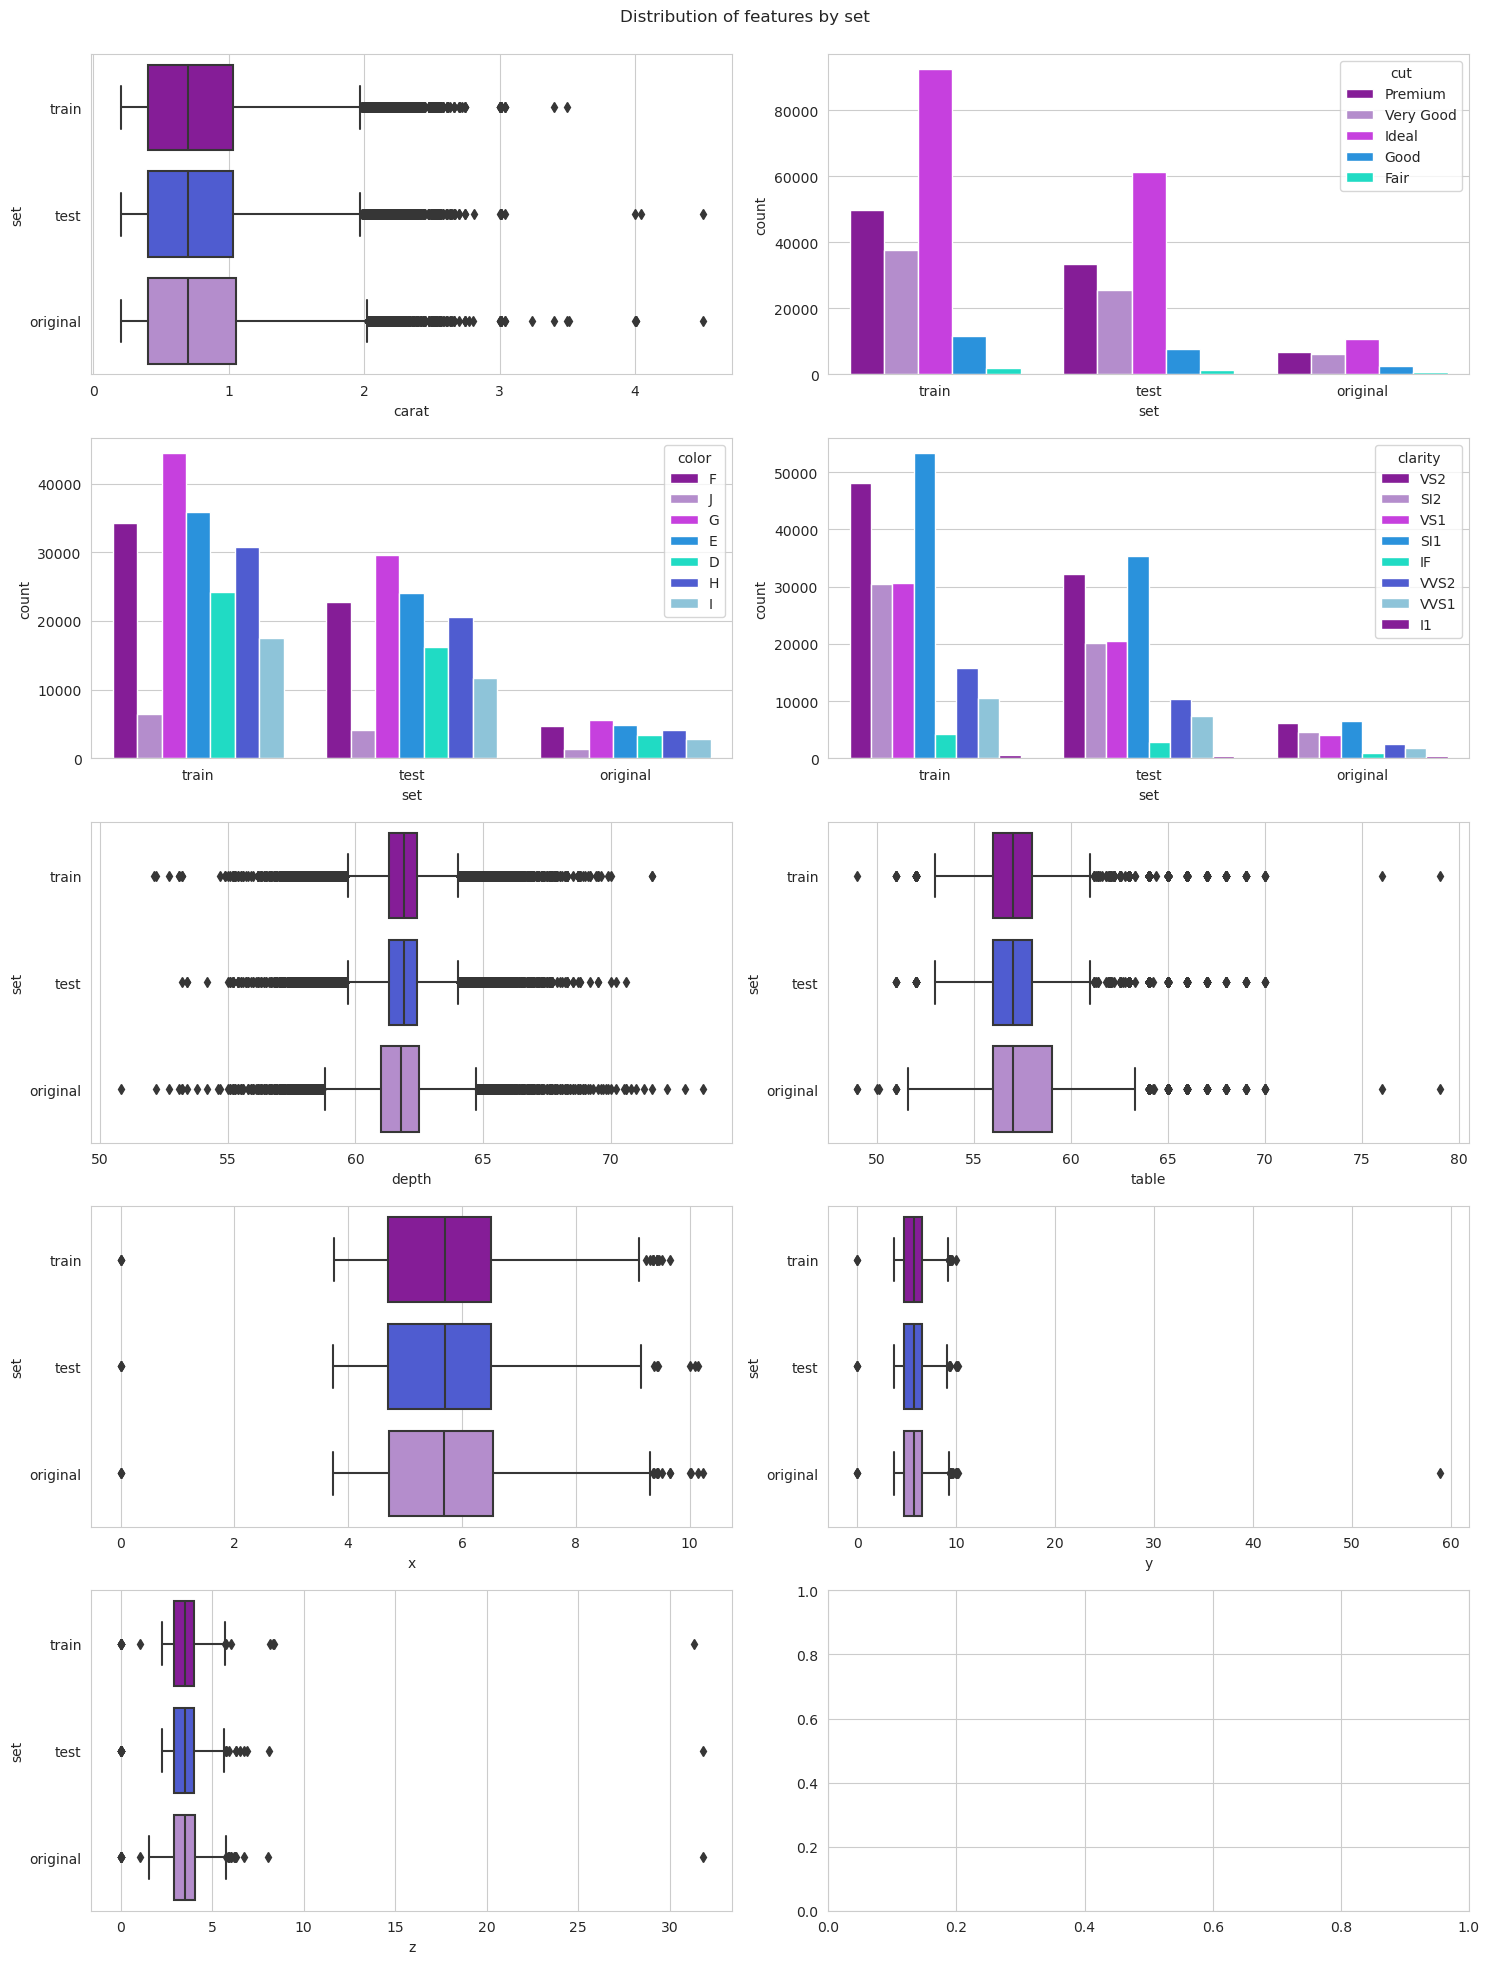

In [26]:
NUM_COLS.append("clarity_scaled")
n_cols = 2
n_rows = np.ceil(len(test_df.columns)/n_cols).astype(int)
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15,n_rows*4))
for feat, ax in zip(test_df.columns, axs.flatten()):
    if feat in NUM_COLS:
        sns.boxplot(data=comb_df, x=feat, ax=ax, y="set", palette=PALETTE_7_C)
    else:
        sns.countplot(data=comb_df, x="set", ax=ax, hue=feat, palette=PALETTE_7)

fig.suptitle('Distribution of features by set')
plt.tight_layout(rect=[0, 0, 1, 0.98])
for df in [train_df, test_df, original_df]:
    df.drop(columns=["set"], errors="ignore")

Text(0.5, 1.0, 'price / depth')

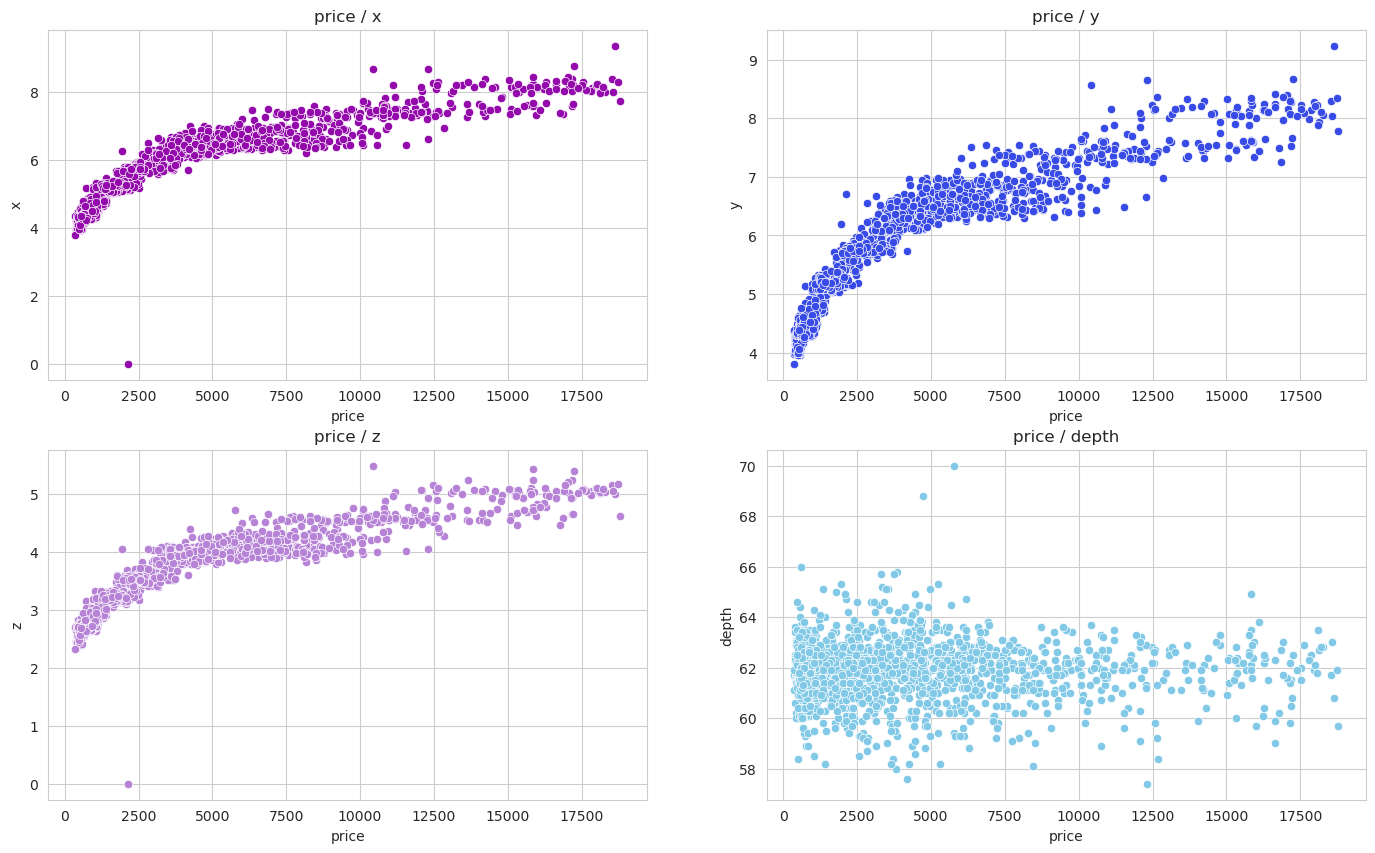

In [27]:
filtred_df = train_df.iloc[::100]

fig, ax = plt.subplots(2, 2, figsize=(17, 10))

sns.scatterplot(ax=ax[0,0], data=filtred_df, x=TARGET,y=POSITION_X, color=PALETTE_7_C[0])
ax[0, 0].set_title(f"{TARGET} / {POSITION_X}")
sns.scatterplot(ax=ax[0,1], data=filtred_df, x=TARGET,y=POSITION_Y, color=PALETTE_7_C[1])
ax[0, 1].set_title(f"{TARGET} / {POSITION_Y}")
sns.scatterplot(ax=ax[1,0], data=filtred_df, x=TARGET,y=POSITION_Z, color=PALETTE_7_C[2])
ax[1, 0].set_title(f"{TARGET} / {POSITION_Z}")
sns.scatterplot(ax=ax[1,1], data=filtred_df, x=TARGET,y=DEPTH, color=PALETTE_7_C[3])
ax[1, 1].set_title(f"{TARGET} / {DEPTH}")

In [28]:
anomaos_out = train_df.query("z < 12")
anomaos_out = anomaos_out.query("x < 14")
anomaos_out = anomaos_out.query("y < 14")

Text(0.5, 0, 'depth')

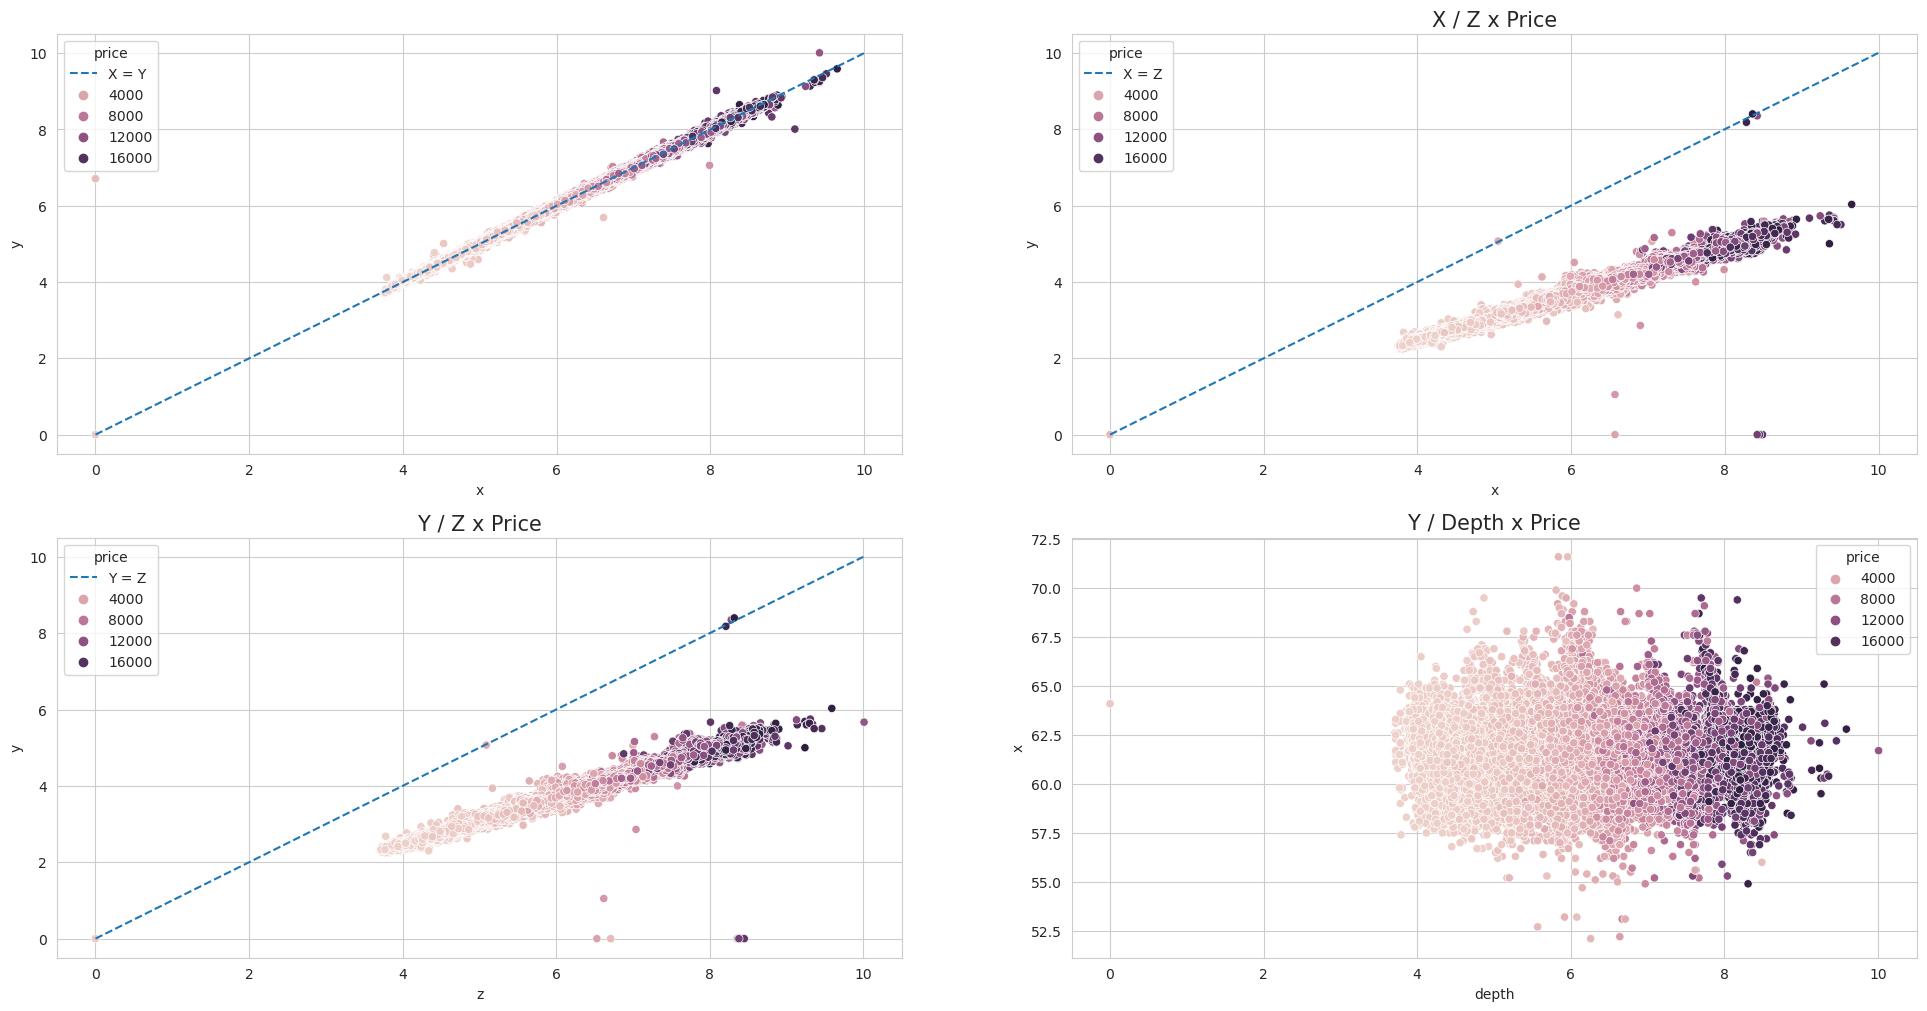

In [29]:
vmin = train_df[TARGET].min()
vmax = train_df[TARGET].max()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
sns.lineplot(x=[0, 10], y=[0, 10], linestyle="--", label="X = Y", ax=ax[0, 0])
sns.scatterplot(data=anomaos_out, x=POSITION_X, y=POSITION_Y, hue=TARGET, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax[0, 0])
ax[0, 0].set_ylabel(POSITION_Y)
ax[0, 0].set_xlabel(POSITION_X)

sns.lineplot(x=[0, 10], y=[0, 10], linestyle="--", label="X = Z", ax=ax[0, 1])
sns.scatterplot(data=anomaos_out, x=POSITION_X, y=POSITION_Z, hue=TARGET, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax[0,1])
ax[0, 1].set_title("X / Z x Price", fontsize=15)
ax[0, 1].set_ylabel(POSITION_Y)
ax[0, 1].set_xlabel(POSITION_X)

sns.lineplot(x=[0, 10], y=[0, 10], linestyle="--", label="Y = Z", ax=ax[1, 0])
sns.scatterplot(data=anomaos_out, x=POSITION_Y, y=POSITION_Z, hue=TARGET, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax[1, 0])
ax[1, 0].set_title("Y / Z x Price", fontsize=15)
ax[1, 0].set_ylabel(POSITION_Y)
ax[1, 0].set_xlabel(POSITION_Z)

sns.scatterplot(data=anomaos_out, x=POSITION_Y, y=DEPTH, hue=TARGET, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax[1, 1])
ax[1, 1].set_title("Y / Depth x Price", fontsize=15)
ax[1, 1].set_ylabel(POSITION_X)
ax[1, 1].set_xlabel(DEPTH)

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
We can see a strong correlation between the price and the position of the reference to the rest of the values, in the same way, we can see a correlation between the depth of the price, to visualize it together with the 3 cords, we will show a 3D graph.
</div>


**🟥ES**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Podemos ver una fuerte correlación entre el el precio y la posición de referente al resto de los valores, de igual manera, se ve una correlación entre la profundidad del precio, para visualizarlo junto a las 3 cordenadas, mostraremos un grafico 3D
</div>

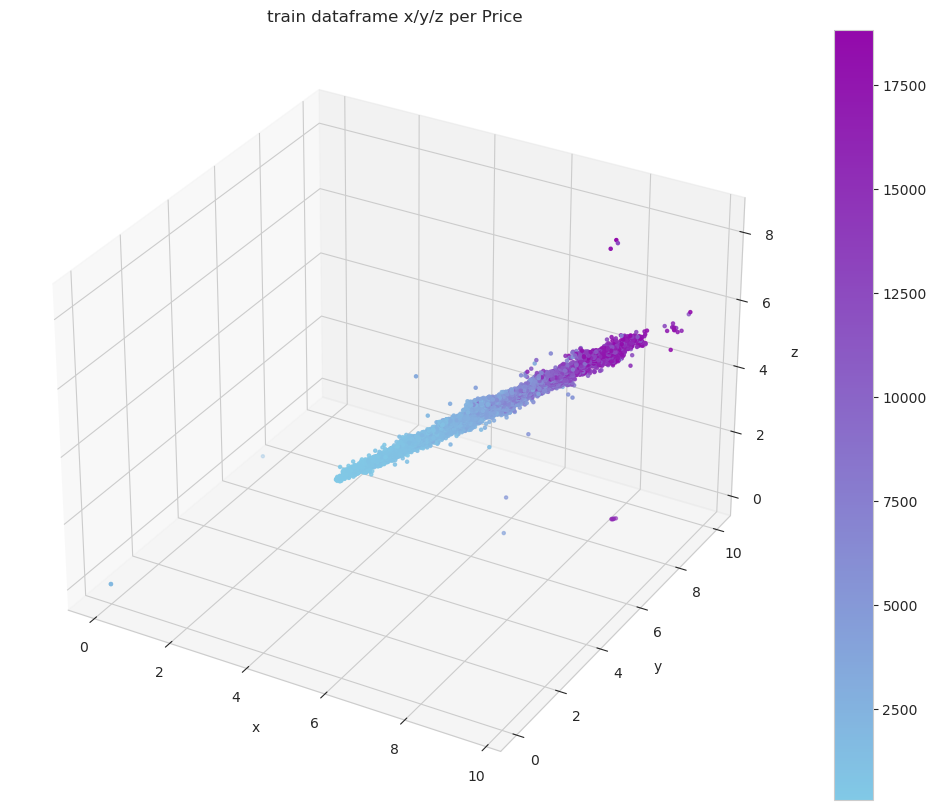

In [30]:
fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot(111, projection = "3d")

p = ax.scatter(anomaos_out[POSITION_X], anomaos_out[POSITION_Y],
               anomaos_out[POSITION_Z], s = 5, c = anomaos_out[TARGET],
               cmap=cmap_2)
fig.colorbar(p)

ax.set_xlabel(POSITION_X)
ax.set_ylabel(POSITION_Y)
ax.set_zlabel(POSITION_Z)
ax.set_title(f"train dataframe {POSITION_X}/{POSITION_Y}/{POSITION_Z} per Price")
#ax.view_init(elev=25, azim=10)
plt.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data preparation and prediction</p>

### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#A766FA; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #5F06D1">Model</p>

In [31]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv',index_col='id')
df_train['is_original']= False
df_test = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv',index_col='id')
df_test['is_original']= False
original = pd.read_csv('/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv',index_col=[0])

# depth has missing values
original = original[-original.depth.isna()]
df_train = pd.concat([df_train, original]).drop_duplicates()
# Drop the columns 'price' and 'id' from the training data
target_col = 'price'
X_train = df_train.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y_train = df_train[f'{target_col}'].reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

print(f"X_train shape :{X_train.shape} , y_train shape :{y_train.shape}")
print(f"X_test shape :{X_test.shape}")

del df_train, df_test

X_train shape :(219809, 10) , y_train shape :(219809,)
X_test shape :(129050, 10)


In [32]:
class AggFeatureExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_col, agg_col, agg_func):
        self.group_col = group_col
        self.group_col_name = ''
        for col in group_col:
            self.group_col_name += col
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.agg_df = None
        self.medians = None
        
    def fit(self, X, y=None):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        
        self.agg_df = X.groupby(group_col)[agg_col].agg(agg_func)
        self.agg_df.columns = [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]
        self.medians = X[agg_col].median()
        
        return self
    
    def transform(self, X):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        agg_df = self.agg_df
        medians = self.medians
        
        X_merged = pd.merge(X, agg_df, left_on=group_col, right_index=True, how='left')
        X_merged.fillna(medians, inplace=True)
        X_agg = X_merged.loc[:, [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]]
        
        return X_agg
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_agg = self.transform(X)
        return X_agg
class Preprocessor:
    def __init__(self, agg_col, agg_func, group_cols, comb_cat_cols, oh_cat_cols, ce_cat_cols):
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.group_cols = group_cols
        self.comb_cat_cols = comb_cat_cols
        self.oh_cat_cols = oh_cat_cols
        self.ce_cat_cols = ce_cat_cols
        
    def preprocess(self, X_train, X_test):
        X_train = self.create_feature(X_train)
        X_test = self.create_feature(X_test)
        
        agg_train, agg_test = [], []
        for group_col in self.group_cols:
            agg_extractor = AggFeatureExtractor(group_col=group_col, agg_col=self.agg_col, agg_func=self.agg_func)
            agg_extractor.fit(pd.concat([X_train, X_test], axis=0))
            agg_train.append(agg_extractor.transform(X_train))
            agg_test.append(agg_extractor.transform(X_test))
        X_train = pd.concat([X_train] + agg_train, axis=1)
        X_test = pd.concat([X_test] + agg_test, axis=1)

        # create_categorical_combinations
        X_train, _ = self.create_categorical_combinations(X_train, self.comb_cat_cols)
        X_test, _ = self.create_categorical_combinations(X_test, self.comb_cat_cols)
        
        # OneHotEncoder
        onehot_train, onehot_test = self.encode_categorical_features(X_train, X_test, self.oh_cat_cols, encoder_type='onehot')

        # CountEncoder
        count_train, count_test = self.encode_categorical_features(X_train, X_test, self.ce_cat_cols, encoder_type='count')

        X_train = pd.concat([X_train, onehot_train, count_train], axis=1).drop(self.ce_cat_cols, axis=1)
        X_test = pd.concat([X_test, onehot_test, count_test], axis=1).drop(self.ce_cat_cols, axis=1)
        
        return X_train, X_test
        
    def create_feature(self, df):
        df['y_carat'] = df['y'] * df['carat']
        df['x_carat'] = df['x'] * df['carat']
        df['area'] = df['y'] * df['x']
        df['area_carat'] = df['carat'] / (df['area'] + 1e-6)
        df['volume'] = df['x'] * df['y'] * df['z']
        df['density'] = df['carat'] / (df['volume'] + 1e-6)
        df['depth_per_volume'] = df['depth'] / (df['volume'] + 1e-6)
        df['depth_per_density'] = df['depth'] / (df['density'] + 1e-6)
        df['depth_per_table'] = df['depth'] / (df['table'] + 1e-6)
        return df

    def create_categorical_combinations(self, df, categorical_columns, max_pattern=3):
        cols = []
        for comb in range(len(categorical_columns)):
            for col in combinations(categorical_columns, comb+1):
                if len(list(col)) > max_pattern:
                    break
                if len(list(col)) > 1:
                    col_names = list(col)
                    new_col = '_'.join(col_names)
                    df[new_col] = df[col_names[0]].astype(str)
                    for c in col_names[1:]:
                        df[new_col] = df[new_col] + '_' + df[c].astype(str)
                cols.append('_'.join(col))
        return df, cols
    
    def encode_categorical_features(self, X_train, X_test, categorical_columns, encoder_type):
        if encoder_type == 'onehot':
            encoder = OneHotEncoder(cols=categorical_columns)
            train_encoder = encoder.fit_transform(X_train[categorical_columns]).add_suffix('_ohe')
            test_encoder = encoder.transform(X_test[categorical_columns]).add_suffix('_ohe')
        elif encoder_type == 'count':
            encoder = CountEncoder(cols=categorical_columns)
            train_encoder = encoder.fit_transform(X_train[categorical_columns]).add_suffix('_count')
            test_encoder = encoder.transform(X_test[categorical_columns]).add_suffix('_count')
        else:
            raise ValueError("Unsupported encoder type. Available options: 'onehot', 'count'")

        return train_encoder, test_encoder

agg_col = ['area_carat', 'volume', 'density', 'depth_per_volume', 'depth_per_density', 'depth_per_table']
agg_func = ['mean', 'std']
group_cols = [['cut'], ['color'], ['clarity'], ['cut', 'color'], ['cut', 'clarity'], ['color', 'clarity'], ['cut', 'color', 'clarity']]
comb_categorical_columns = ['cut', 'color', 'clarity']
oh_categorical_columns = ['cut', 'color', 'clarity', 'is_original']
ce_categorical_columns = ['cut', 'color', 'clarity', 'is_original', 'cut_color', 'cut_clarity', 'color_clarity', 'cut_color_clarity']

pp = Preprocessor(agg_col, agg_func, group_cols, comb_categorical_columns, oh_categorical_columns, ce_categorical_columns)
X_train, X_test = pp.preprocess(X_train, X_test)

print(f"X_train shape :{X_train.shape} , y_train shape :{y_train.shape}")
print(f"X_test shape :{X_test.shape}")

X_train shape :(219809, 129) , y_train shape :(219809,)
X_test shape :(129050, 129)


In [33]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=3):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

kfold = True
n_splits = 5
random_state = 2023
random_state_list = [_ for _ in range(10)]

splitter = Splitter(kfold=kfold, n_splits=n_splits)

In [34]:
# Hyperparameters
n_estimators = 9999
device = "cpu"

xgb_params = {
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.67,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'verbosity': 0,
    'eval_metric': 'rmse'
}

lgb_params = {
    'n_estimators': n_estimators,
    'learning_rate': 0.05,
    'max_depth': 9,
    'subsample_for_bin': 20000,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'regression',
    'device': device
}

cb_params = {
    'n_estimators': n_estimators,
    'learning_rate': 0.05,
    'max_depth': 6,
    'loss_function': 'RMSE',
    'task_type': device.upper()
}

In [35]:
def train_regressor(regressor, X_train, y_train, X_val, y_val, regressor_params, early_stopping_rounds=500, random_state=42):
    regressor = regressor(**regressor_params, random_state=random_state)
    eval_set = [(X_val, y_val)]
    regressor.fit(X_train, y_train, early_stopping_rounds=early_stopping_rounds, eval_set=eval_set, verbose=1000)
    val_preds = regressor.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    return regressor, rmse
xgb_models, lgb_models, cb_models = [], [], []
xgb_scores, lgb_scores, cb_scores = [], [], []
for X_train_, X_val, y_train_, y_val in splitter.split_data(X_train, y_train, random_state_list=random_state_list):
    xgb_model, xgb_rmse = train_regressor(xgb.XGBRegressor, X_train_, y_train_, X_val, y_val, xgb_params)
    lgb_model, lgb_rmse = train_regressor(lgb.LGBMRegressor, X_train_, y_train_, X_val, y_val, lgb_params)
    cb_model, cb_rmse = train_regressor(CatBoostRegressor, X_train_, y_train_, X_val, y_val, cb_params)
    xgb_models.append(deepcopy(xgb_model)), lgb_models.append(deepcopy(lgb_model)), cb_models.append(deepcopy(cb_model))
    xgb_scores.append(xgb_rmse), lgb_scores.append(lgb_rmse), cb_scores.append(cb_rmse)


[0]	validation_0-rmse:4542.98618
[99]	validation_0-rmse:568.12421
0:	learn: 3849.2902665	test: 3841.9563257	best: 3841.9563257 (0)	total: 141ms	remaining: 23m 24s
1000:	learn: 534.8143749	test: 562.9786116	best: 562.6243911 (866)	total: 1m 4s	remaining: 9m 35s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 562.6243911
bestIteration = 866

Shrink model to first 867 iterations.
[0]	validation_0-rmse:4540.77179
[99]	validation_0-rmse:578.40841
0:	learn: 3850.7653040	test: 3833.9806241	best: 3833.9806241 (0)	total: 82.3ms	remaining: 13m 42s
1000:	learn: 536.4590819	test: 571.8222813	best: 571.8039645 (965)	total: 1m 3s	remaining: 9m 28s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 571.5132506
bestIteration = 1141

Shrink model to first 1142 iterations.
[0]	validation_0-rmse:4570.41988
[99]	validation_0-rmse:586.51758
0:	learn: 3842.4686045	test: 3868.6818907	best: 3868.6818907 (0)	total: 78.1ms	remaining: 13m
1000:	learn: 530.2150568	test: 581.3856

In [36]:
class OptunaWeights:
    def __init__(self, random_state):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)
        score = np.sqrt(mean_squared_error(y_true, weighted_pred))
        return score

    def fit(self, y_true, y_preds, n_trials=300):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=300):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights
models = np.array([xgb_models, lgb_models, cb_models]).T.tolist()
names = ['XGBoost', 'LightGBM', 'CatBoost']

test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []

i = 0
for _model, (X_train_, X_val, y_train_, y_val) in zip(models, splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
    val_preds, test_preds, zero_test_preds = [], [], []
    for model in _model:
        oof_pred = model.predict(X_val.values)
        test_pred = model.predict(X_test.values)
        val_preds.append(oof_pred)
        test_preds.append(test_pred)
        
    optweights = OptunaWeights(random_state=random_state)
    val_pred = optweights.fit_predict(y_val.values, val_preds)
    score = np.sqrt(mean_squared_error(y_val, val_pred))
    print(f'[FOLD-{n} SEED-{random_state_list[m]}] RMSE score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    i += 1
    
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble RMSE score {mean_score:.5f} ± {std_score:.5f}')

print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(names, mean_weights, std_weights):
    print(f'{name} {mean_weight:.5f} ± {std_weight:.5f}')

[FOLD-0 SEED-0] RMSE score 559.64665
[FOLD-1 SEED-0] RMSE score 568.76560
[FOLD-2 SEED-0] RMSE score 578.78509
[FOLD-3 SEED-0] RMSE score 566.82781
[FOLD-4 SEED-0] RMSE score 558.07905
[FOLD-0 SEED-1] RMSE score 556.58094
[FOLD-1 SEED-1] RMSE score 563.30865
[FOLD-2 SEED-1] RMSE score 563.91166
[FOLD-3 SEED-1] RMSE score 576.50179
[FOLD-4 SEED-1] RMSE score 576.41686
[FOLD-0 SEED-2] RMSE score 564.00536
[FOLD-1 SEED-2] RMSE score 574.72605
[FOLD-2 SEED-2] RMSE score 574.66052
[FOLD-3 SEED-2] RMSE score 560.36173
[FOLD-4 SEED-2] RMSE score 562.68922
[FOLD-0 SEED-3] RMSE score 566.45263
[FOLD-1 SEED-3] RMSE score 568.23971
[FOLD-2 SEED-3] RMSE score 573.18931
[FOLD-3 SEED-3] RMSE score 558.11398
[FOLD-4 SEED-3] RMSE score 568.91170
[FOLD-0 SEED-4] RMSE score 559.19554
[FOLD-1 SEED-4] RMSE score 559.20388
[FOLD-2 SEED-4] RMSE score 578.88068
[FOLD-3 SEED-4] RMSE score 564.42157
[FOLD-4 SEED-4] RMSE score 572.09251
[FOLD-0 SEED-5] RMSE score 549.97089
[FOLD-1 SEED-5] RMSE score 573.37884
[

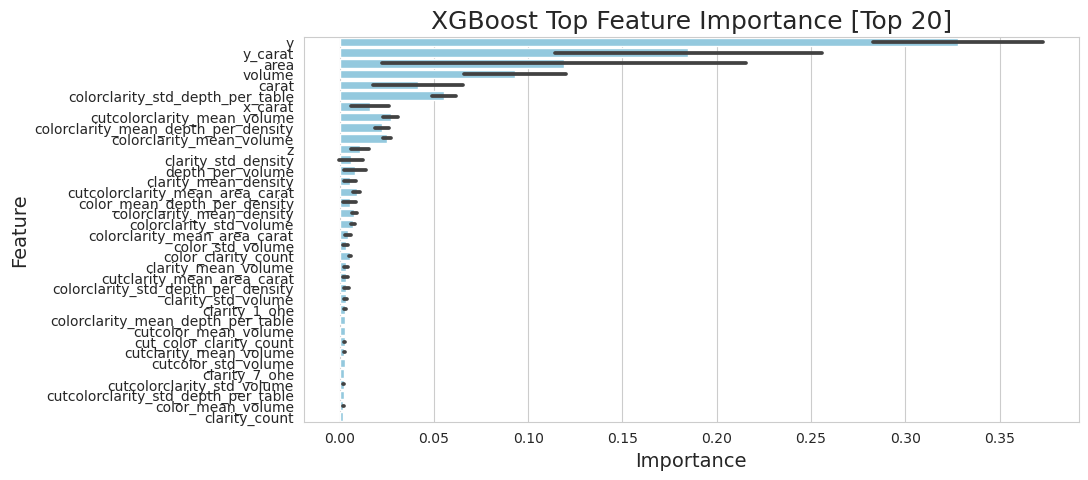

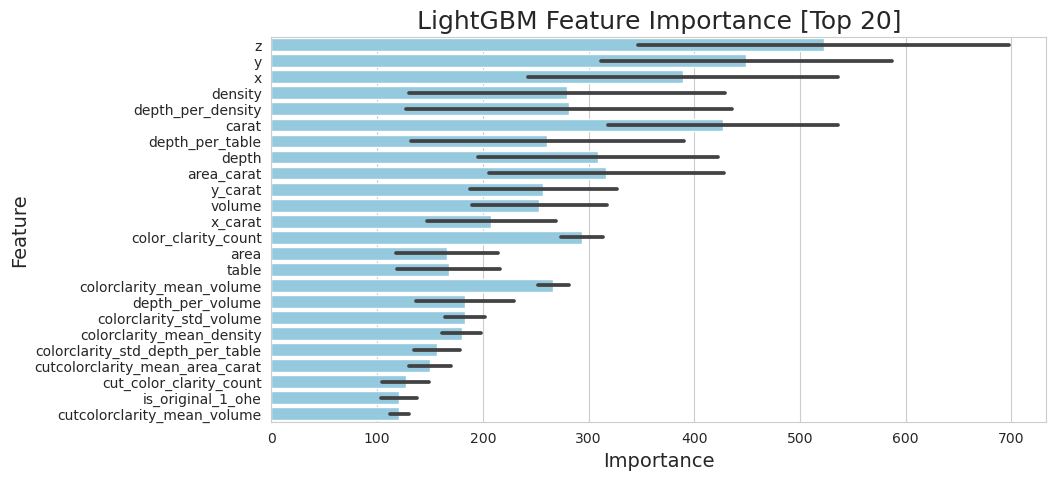

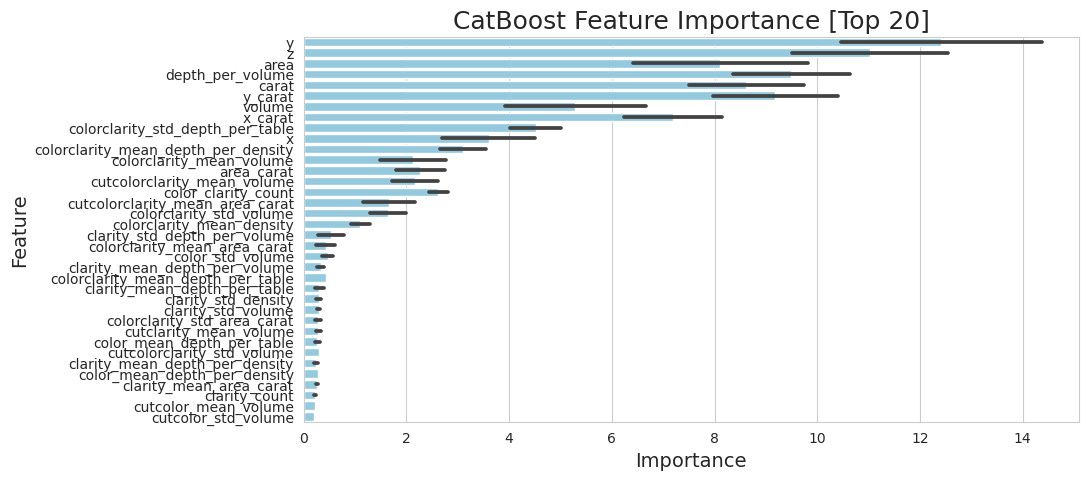

In [37]:
def visualize_importance(models, feature_cols, title, top=20):
    importances = []
    feature_importance = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["importance"] = model.feature_importances_
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(top)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='importance', y='feature', data=feature_importance, color='skyblue', errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance [Top {top}]', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
visualize_importance(xgb_models, list(X_train.columns), 'XGBoost Top')
visualize_importance(lgb_models, list(X_train.columns), 'LightGBM')
visualize_importance(cb_models, list(X_train.columns), 'CatBoost')


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Send prediction</p>

<AxesSubplot:xlabel='price', ylabel='Count'>

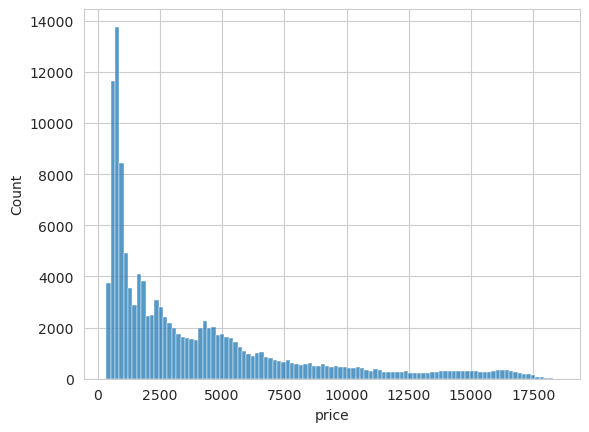

In [38]:
submission_df = pd.read_csv("/kaggle/input/playground-series-s3e8/sample_submission.csv", index_col='id')
submission_df['price'] = test_predss
submission_df.to_csv('submission.csv')
sns.histplot(submission_df.price)

### The model and data analysis is in process, it will be updated in the next days, if you liked it or if it helped you feel free to leave your upvote.